In [104]:
!pwd

/c/Users/joyjp/Desktop/molgroups New Directory/molgroups/Reflectometry/ssBLM


In [105]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate
import scipy.fft 
import molgroups as mol
import math
from numpy import *

In [106]:
# initialize canvas, two numpy arrays: area, nSLD; [200] (100Å, 0.5 Å stepsize)
# initialize with zeros
box_sld = 2e-6
dimension = 200
stepsize = 0.5
maxarea = 1.0
box = mol.Box2Err()
box.nSL = box.vol * box_sld
aArea = np.zeros(dimension).tolist()
anSL  = np.zeros(dimension).tolist()
anSLD = np.zeros(dimension).tolist()
aArea2 = np.zeros(dimension).tolist()
anSL2  = np.zeros(dimension).tolist()
anSLD2 = np.zeros(dimension).tolist()
aArea3 = np.zeros(dimension).tolist()
anSL3  = np.zeros(dimension).tolist()
anSLD3 = np.zeros(dimension).tolist()
aArea4 = np.zeros(dimension).tolist()
anSL4  = np.zeros(dimension).tolist()
anSLD4 = np.zeros(dimension).tolist()
aArea5 = np.zeros(dimension).tolist()
anSL5  = np.zeros(dimension).tolist()
anSLD5 = np.zeros(dimension).tolist()
aArea6 = np.zeros(dimension).tolist()
anSL6  = np.zeros(dimension).tolist()
anSLD6 = np.zeros(dimension).tolist()
aArea7 = np.zeros(dimension).tolist()
anSL7  = np.zeros(dimension).tolist()
anSLD7 = np.zeros(dimension).tolist()
aArea8 = np.zeros(dimension).tolist()
anSL8  = np.zeros(dimension).tolist()
anSLD8 = np.zeros(dimension).tolist()
aArea9 = np.zeros(dimension).tolist()
anSL9  = np.zeros(dimension).tolist()
anSLD9 = np.zeros(dimension).tolist()
aArea10 = np.zeros(dimension).tolist()
anSL10  = np.zeros(dimension).tolist()
anSLD10 = np.zeros(dimension).tolist()
aArea11 = np.zeros(dimension).tolist()
anSL11  = np.zeros(dimension).tolist()
anSLD11 = np.zeros(dimension).tolist()

In [107]:
# initialize a BLM_quaternary object (standard constructor)
# set values for lipids using the init function (we do not do this here, we use the standard from constructor)
# set values using fnSet
#     sigma = 2.5, bulknsld = 0., startz = 10, l_lipid1 = l_lipid2 = 13.6, vf_bilayer = 1., everything else preset)
# write the area and nSLD out using fnWriteProfile onto the Canvas (Maxarea=100Å2)

#BLM_quaternary_1 = mol.BLM_quaternary()
ssBLM_quaternary_1 = mol.ssBLM_quaternary()
ssBLM_quaternary_1 = mol.ssBLM_quaternary()
BLM_quaternary_1 = mol.BLM_quaternary()
#test_sld = 4e-6     # this is a test SLD. The acyl chains should come to this SLD if everything is working properly.
na1, nh1, nm1, va1, vm1, vh1, lh1 = -2.0874E-04, 6.0012E-04, -9.15E-05, 972, 98.8, 330, 10.5 #dopc -- diologio phosphocholine : type of phospholipid
na2, nh2, nm2, va2, vm2, vh2, lh2 = 0, 0, 0, 0, 0, 0, 0 
na3, nh3, nm3, va3, vm3, vh3, lh3 = 0, 0, 0, 0, 0, 0, 0
vc, nc = 0, 0
ssBLM_quaternary_1.fnInit(va1, na1, vm1, nm1, vh1,nh1, lh1, va2, na2, vm2, nm2, vh2, nh2, lh2, va3, na3, vm3, nm3, vh3, nh3,lh3, vc, nc)
ssBLM_quaternary_1.fnInit(va1, na1, vm1, nm1, vh1,nh1, lh1, va2, na2, vm2, nm2, vh2, nh2, lh2, va3, na3, vm3, nm3, vh3, nh3,lh3, vc, nc)

#sigma, bulknsld, startz, l_lipid1, l_lipid2, vf_bilayer = 2.0, -0.56E-06, 50, 11.6, 11.6, 1
#BLM_quaternary_1.fnSet(sigma, bulknsld, startz, l_lipid1, l_lipid2, vf_bilayer)

#Utilizing the h2o parameters
sigma = 5.20835
bulknsld = -0.403866
global_rough = 4.419
rho_substrate = 2.29067
rho_siox = 3.221
l_siox = 0
l_submembrane = 55.074 #number in output multipled by 2 since erroneous multiplication by factor of 0.5
l_lipid1 = 14.154
l_lipid2 = 11.400
vf_bilayer = 0.9042


#2.0, -0.403866, 4.419, 2.29067, 3.221, 14.154, 11.4, 10.0, 10.0 0.9042
ssBLM_quaternary_1.fnSet(sigma, bulknsld, global_rough, rho_substrate, rho_siox, l_siox, l_submembrane, l_lipid1, l_lipid2, vf_bilayer) 



#BLM_quaternary_1.fnInit(va1, na1, vm1, nm1, vh1,nh1, lh1, va2, na2, vm2, nm2, vh2, nh2, lh2, va3, na3, vm3, nm3, vh3, nh3,lh3, vc, nc)

#sigma, bulknsld, startz, l_lipid1, l_lipid2, vf_bilayer = 2.0, -0.56E-06, 50, 11.6, 11.6, 1
#BLM_quaternary_1.fnSet(sigma, bulknsld, startz, l_lipid1, l_lipid2, vf_bilayer)



#sigma, bulknsld, global_rough, rho_substrate,nf_tether, mult_tether, l_tether, l_lipid1, l_lipid2, vf_bilayer = 2.0, -0.56E-06, 2.0, 2.07E-06, 0.3, 3, 20, 11.6, 11.6, 1
#ssBLM_quaternary_1.fnSet(sigma, bulknsld, global_rough, rho_substrate, nf_tether, mult_tether, l_tether, l_lipid1, l_lipid2, vf_bilayer)


#print(ssBLM_quaternary_1.l_tether)
#print(ssBLM_quaternary_1.tether.l)

In [108]:
dd9, aArea9, anSL9 = ssBLM_quaternary_1.fnWriteProfile(aArea9, anSL9, dimension, stepsize, maxarea) #problem with ssBLM
dd, aArea, anSL = ssBLM_quaternary_1.lipid1.fnWriteProfile(aArea, anSL, dimension, stepsize, dd9)
dd2, aArea2, anSL2 = ssBLM_quaternary_1.lipid2.fnWriteProfile(aArea2, anSL2, dimension, stepsize, dd9)
dd3, aArea3, anSL3 = ssBLM_quaternary_1.methyl1.fnWriteProfile(aArea3, anSL3, dimension, stepsize, dd9)
dd4, aArea4, anSL4 = ssBLM_quaternary_1.methyl2.fnWriteProfile(aArea4, anSL4, dimension, stepsize,dd9)
dd5, aArea5, anSL5 = ssBLM_quaternary_1.headgroup1.fnWriteProfile(aArea5, anSL5, dimension, stepsize, dd9) #issue with headgroup1
dd6, aArea6, anSL6 = ssBLM_quaternary_1.headgroup2.fnWriteProfile(aArea6, anSL6, dimension, stepsize, dd9)
dd7, aArea7, anSL7 = ssBLM_quaternary_1.substrate.fnWriteProfile(aArea7, anSL7, dimension, stepsize, dd9)
dd8, aArea8, anSL8 = ssBLM_quaternary_1.siox.fnWriteProfile(aArea8, anSL8, dimension, stepsize, dd9)
#dd10, aArea10, anSL10 = ssBLM_quaternary_1.substrate.fnWriteProfile(aArea10, anSL10, dimension, stepsize, dd9)
#dd11, aArea11, anSL11 = ssBLM_quaternary_1.tetherg.fnWriteProfile(aArea11, anSL11, dimension, stepsize, dd9)
#sumArea = aArea + aArea2 + aArea3 + aArea4 + aArea5 + aArea6 + aArea7 + aArea8 #





#dd, aArea2, anSL = box.fnWriteProfile([0]*dimension, [0]*dimension, dimension, stepsize, maxarea)
#aArea = np.array(aArea)
#anSL = np.array(anSL)
#anSLD = anSL / (aArea * stepsize)

anSLD = np.array(anSL) / (np.array(aArea) * stepsize)
anSLD2 = np.array(anSL2) / (np.array(aArea2) * stepsize)
anSLD3 = np.array(anSL3) / (np.array(aArea3) * stepsize)
anSLD4 = np.array(anSL4) / (np.array(aArea4) * stepsize)
anSLD5 = np.array(anSL5) / (np.array(aArea5) * stepsize)
anSLD6 = np.array(anSL6) / (np.array(aArea6) * stepsize)
anSLD7 = np.array(anSL7) / (np.array(aArea7) * stepsize)
anSLD8 = np.array(anSL8) / (np.array(aArea8) * stepsize)
#anSLD10 = np.array(anSL10) / (np.array(aArea10) * stepsize)
#anSLD11 = np.array(anSL11) / (np.array(aArea11) * stepsize)




sumArea = np.array(aArea) + np.array(aArea2) + np.array(aArea3) + np.array(aArea4) + np.array(aArea6) + np.array(aArea7) + np.array(aArea8)  + np.array(aArea10) 
sumSL= np.array(anSL) + np.array(anSL2) + np.array(anSL3) + np.array(anSL4) + np.array(anSL5) + np.array(anSL6)+ np.array(anSL7) + np.array(anSL8) + np.array(anSL10)  
sumSLD = sumSL / sumArea
print(sumSLD)

#fnWriteFile
#sumArea = np.add(aArea,aArea2) 
#sumArea2 = np.add(aArea3,aArea4)
#sumArea2 = np.add(aArea3,aArea4)

print(anSLD)








[ 1.14533500e+00  1.14533500e+00  1.14533500e+00  1.14533500e+00
  1.14533500e+00  1.14533500e+00  1.14533500e+00  1.14533500e+00
  1.14533500e+00  1.14533500e+00  1.14533500e+00  1.14533500e+00
  1.14533500e+00  1.14585847e+00  1.14609383e+00  1.14642204e+00
  1.14687389e+00  1.14748806e+00  1.14831226e+00  1.14940423e+00
  1.15083259e+00  1.15267722e+00  1.15502911e+00  1.15798964e+00
  1.16166889e+00  1.16618314e+00  1.17165137e+00  1.17819077e+00
  1.18594261e+00  1.19493613e+00  1.20528618e+00  1.21704478e+00
  1.23023229e+00  1.24483238e+00  1.26078844e+00  1.27800182e+00
  1.29633208e+00  1.31559968e+00  1.33559090e+00  1.35606493e+00
  1.37676276e+00  1.39741734e+00  1.41776432e+00  1.43755259e+00
  1.45655405e+00  1.47457172e+00  1.49144582e+00  1.50705749e+00
  1.52132993e+00  1.53422726e+00  1.54575129e+00  1.55593665e+00
  1.56484500e+00  1.57255861e+00  1.57917408e+00  1.58479637e+00
  1.58953364e+00  1.59349294e+00  1.59677689e+00  1.59948130e+00
  1.60169362e+00  1.60349

<ipython-input-108-cd5d0dc22085>:23: RuntimeWarning: invalid value encountered in true_divide
  anSLD = np.array(anSL) / (np.array(aArea) * stepsize)
<ipython-input-108-cd5d0dc22085>:24: RuntimeWarning: invalid value encountered in true_divide
  anSLD2 = np.array(anSL2) / (np.array(aArea2) * stepsize)
<ipython-input-108-cd5d0dc22085>:25: RuntimeWarning: invalid value encountered in true_divide
  anSLD3 = np.array(anSL3) / (np.array(aArea3) * stepsize)
<ipython-input-108-cd5d0dc22085>:26: RuntimeWarning: invalid value encountered in true_divide
  anSLD4 = np.array(anSL4) / (np.array(aArea4) * stepsize)
<ipython-input-108-cd5d0dc22085>:27: RuntimeWarning: invalid value encountered in true_divide
  anSLD5 = np.array(anSL5) / (np.array(aArea5) * stepsize)
<ipython-input-108-cd5d0dc22085>:28: RuntimeWarning: invalid value encountered in true_divide
  anSLD6 = np.array(anSL6) / (np.array(aArea6) * stepsize)
<ipython-input-108-cd5d0dc22085>:29: RuntimeWarning: invalid value encountered in tru

In [109]:
        
print(dd)
print(dd2)
print(dd3)
print(dd4)
print(dd5)
print(dd6)
print(dd7)
print(dd8)
print(dd9)
#print(dd10)
#print(dd11)

76.59649122807018
76.59649122807018
76.59649122807018
76.59649122807018
76.59649122807018
76.59649122807018
76.59649122807018
76.59649122807018
76.59649122807018


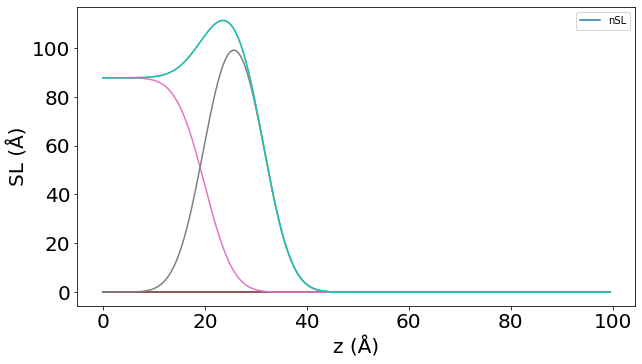

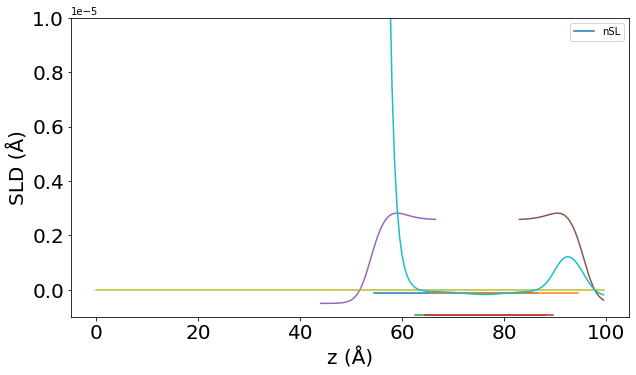

In [110]:
x = [stepsize * i for i in range(dimension)]
fig, ax = plt.subplots()
ax.figure.set_size_inches(10, 5.5)
ax.plot(x, anSL)
ax.plot(x,anSL2)
ax.plot(x,anSL3)
ax.plot(x,anSL4)
ax.plot(x,anSL5)
ax.plot(x,anSL6)
ax.plot(x,anSL7)
ax.plot(x,anSL8)
ax.plot(x,anSL9)
#ax.plot(x,anSL10)
#ax.plot(x,anSL11)
ax.plot(x,sumSL)
plt.legend(['nSL'])
ax.set_ylabel('SL (Å)', fontsize=20)
ax.set_xlabel('z (Å)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
#plt.xlim([0, 200])
plt.show()


fig, ax = plt.subplots()
ax.figure.set_size_inches(10, 5.5)
ax.plot(x, anSLD)
ax.plot(x,anSLD2)
ax.plot(x,anSLD3)
ax.plot(x,anSLD4)
ax.plot(x,anSLD5)
ax.plot(x,anSLD6)
ax.plot(x,anSLD7)
ax.plot(x,anSLD8)
ax.plot(x,anSLD9)
#ax.plot(x,anSLD10)
#ax.plot(x,anSLD11)
ax.plot(x,sumSLD)
plt.legend(['nSL'])
ax.set_ylabel('SLD (Å)', fontsize=20)
ax.set_xlabel('z (Å)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.ylim([-1E-06, 1E-05])
plt.show()



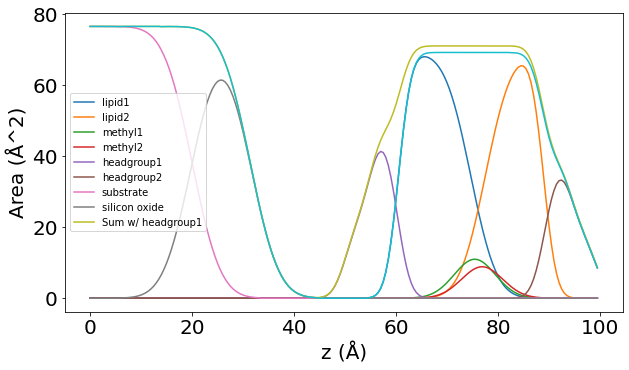

In [111]:
x = [stepsize * i for i in range(dimension)]
fig, ax = plt.subplots()
ax.figure.set_size_inches(10, 5.5)
#x = np.linspace(0, 150, 1000)
ax.plot(x,aArea)
ax.plot(x,aArea2)
plt.plot(x,aArea3)
plt.plot(x,aArea4)
plt.plot(x,aArea5)
plt.plot(x,aArea6)
plt.plot(x,aArea7)
plt.plot(x,aArea8)
plt.plot(x,aArea9)
#plt.plot(x,aArea10)
#plt.plot(x,aArea11)
plt.plot(x,sumArea)
plt.legend(['lipid1', 'lipid2', 'methyl1', 'methyl2', 'headgroup1', 'headgroup2', 'substrate', 'silicon oxide', 'Sum w/ headgroup1'])
#plt.legend(['Area'])
ax.set_ylabel('Area (Å^2)', fontsize=20)
ax.set_xlabel('z (Å)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()


### x = [stepsize * i for i in range(dimension)]
fig, ax = plt.subplots()
ax.figure.set_size_inches(10, 5.5)
ax.plot(x, anSLD)
ax.plot(x,anSLD2)
ax.plot(x,anSLD3)
ax.plot(x,anSLD4)
ax.plot(x,anSLD5)
ax.plot(x,anSLD6)
ax.plot(x,anSLD7)
ax.plot(x,anSLD8)
ax.plot(x,anSLD9)
ax.plot(x,sumSLD)
plt.legend(['nSLD'])
ax.set_ylabel('nSLD (1/Å^2)', fontsize=20)
ax.set_xlabel('z (Å)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.draw()

In [112]:
# identify bilayer center using the bilayer object (methyl1_z+0.5*methyl1_l)
# center bilayer on canvas
# |l-----------------------x-------------------------h|
center = BLM_quaternary_1.fnGetCenter()
center = center//stepsize
# calculate difference between
canvas_center = dimension//2
n = int(canvas_center - center)
centered_bilayer = np.roll(anSLD, n)
# symmetrize the bilayer around this center
# |l-----------------------x-------------------------h|          +
# |h-----------------------x-------------------------l|
# ------
# |lh----------------------x------------------------hl|
symmetrized_bilayer = np.add(centered_bilayer,centered_bilayer[::-1])*0.5
symmetrized_bilayer -= bulknsld
half_bilayer = symmetrized_bilayer[int(dimension/2):]

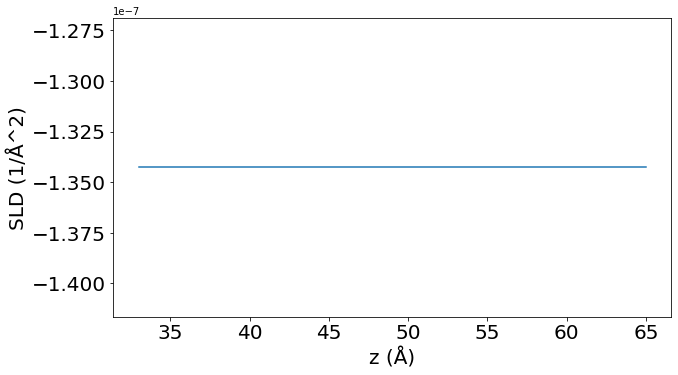

In [113]:
x = [stepsize*i for i in range(dimension)]

fig, ax = plt.subplots()
ax.figure.set_size_inches(10, 5.5)
ax.plot(x, centered_bilayer)
#ax.legend(['model', 'experiment'], fontsize=16)
#ax.set_xlim([0, 50])
#ax.set_ylim([0, 2.5])
ax.set_ylabel('SLD (1/Å^2)', fontsize=20)
ax.set_xlabel('z (Å)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.figure.savefig("CenteredSLD.pdf")
plt.draw()

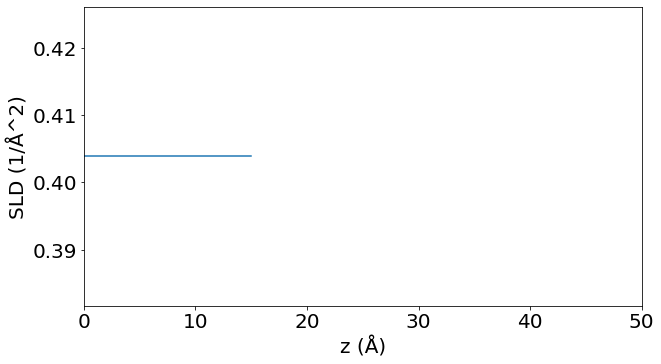

In [114]:
x = [stepsize * i for i in range(len(half_bilayer))]

fig, ax = plt.subplots()
ax.figure.set_size_inches(10, 5.5)
ax.plot(x, half_bilayer)
#ax.legend(['model', 'experiment'], fontsize=16)
ax.set_xlim([0, 50])
#ax.set_ylim([0, 2.5])
ax.set_ylabel('SLD (1/Å^2)', fontsize=20)
ax.set_xlabel('z (Å)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.figure.savefig("HalfDiffProfile.pdf")
plt.draw()

In [115]:
# cosine tranform of the nSLD(z) canvas to get F(q)
dct_dimension = 5000
F = scipy.fft.dct(half_bilayer, n=dct_dimension)
F = np.abs(F)
x = np.array([np.pi/(2*dct_dimension*stepsize)*(2*i)  for i in range(int(dct_dimension))])

In [116]:
F2 = np.loadtxt("dopc.dat", delimiter=None, skiprows=1)
F2 = np.abs(F2)

OSError: dopc.dat not found.

In [ ]:
fig, ax = plt.subplots()
ax.figure.set_size_inches(10, 5.5)
ax.plot(x, F)
ax.plot(F2[:,0], F2[:,1]/17e3)
ax.legend(['model', 'experiment'], fontsize=16)
ax.set_xlim([0, 1])
#ax.set_ylim([0, 2.5])
ax.set_ylabel('|F| (1/Å)', fontsize=20)
ax.set_xlabel('q (1/Å)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.figure.savefig("ExpTheoComp.pdf")
plt.draw()

In [ ]:
def modelformfactor(lq, bilayer, l_lipid, vf_bilayer, sigma, bulknsld, prefactor):
    
    #TODO: Think about how to set those variables more conveniently
    maxarea = 100
    stepsize = 0.5
    dimension = 300
    startz = 50
    
    aArea = np.zeros(dimension).tolist()
    anSL  = np.zeros(dimension).tolist()
    anSLD = np.zeros(dimension).tolist()
 
    bilayer.fnSet(sigma, bulknsld, startz, l_lipid, l_lipid, vf_bilayer)
    dd, aArea, anSL = bilayer.fnWriteProfile(aArea, anSLD, dimension, stepsize, maxarea)
    print(aArea)
    #TODO: speedup
    for i in range(len(aArea)):
        if aArea[i] != 0:
            anSLD[i] = anSL[i] / (aArea[i]*stepsize) * aArea[i]/dd + bulknsld * (1 - aArea[i]/dd)
        else:
            anSLD[i] = bulknsld

    center = bilayer.fnGetCenter()
    center = center//stepsize
    canvas_center = dimension//2
    n = int(canvas_center - center)
    centered_bilayer = np.roll(anSLD, n)
    symmetrized_bilayer = np.add(centered_bilayer,centered_bilayer[::-1])*0.5
    symmetrized_bilayer -= bulknsld
    half_bilayer = symmetrized_bilayer[int(dimension/2):]
    
    #TODO: Make sure that lq and x are roughly comparable
    dct_dimension = 5000
    F = scipy.fft.dct(half_bilayer, n=dct_dimension)
    F = np.abs(F)
    x = np.array([np.pi / (2*dct_dimension*stepsize)*(2*i)  for i in range(int(dct_dimension))])
    
    #interpolate (x, F) onto lq -> (lq, modelform)
    modelform =  np.interp(lq, x, F, left=None, right=None, period=None)*prefactor
    
    return modelform

In [ ]:
bilayer = mol.BLM_quaternary()
na1, nh1, nm1, va1, vm1, vh1, lh1 = 0.00760, 0.00461, 0.000468, 972.00, 98, 331.00, 9.56 
na2, nh2, nm2, va2, vm2, vh2, lh2 = 0, 0, 0, 0, 0, 0, 0 
na3, nh3, nm3, va3, vm3, vh3, lh3 = 0, 0, 0, 0, 0, 0, 0
vc, nc = 0, 0
bilayer.fnInit(va1, na1, vm1, nm1, vh1,nh1, lh1, va2, na2, vm2, nm2, 
                        vh2, nh2, lh2, va3, na3, vm3, nm3, vh3, nh3,lh3, vc, nc)

F2 = np.loadtxt("dopc.dat", delimiter=None, skiprows=1)
F2 = np.abs(F2)
form_exp = F2[:,1]
#TODO: Talk to Stephanie about error bars
dform_exp = form_exp*0.05
q_exp = F2[:,0]

mf = modelformfactor(q_exp, bilayer, 11.6, 1.0, 2, 9.4114E-06, 17000)

In [ ]:
fig, ax = plt.subplots()
ax.figure.set_size_inches(10, 5.5)
ax.plot(q_exp, mf)
ax.errorbar(q_exp, form_exp, dform_exp)
ax.legend(['model', 'experiment'], fontsize=16)
# ax.set_xlim([0, 1])
#ax.set_ylim([0, 2.5])
ax.set_ylabel('|F| (1/Å)', fontsize=20)
ax.set_xlabel('q (1/Å)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.figure.savefig("ExpTheoComp.pdf")
plt.draw()